# Problem 19.1

This is a problem with a single decision variable denoting mass fraction. Mass fraction, $x$, is constrained to the interval from 0 to 1. It's useful to plot the function before attempting to find a maximum value.

Text(0.5,0,'x')

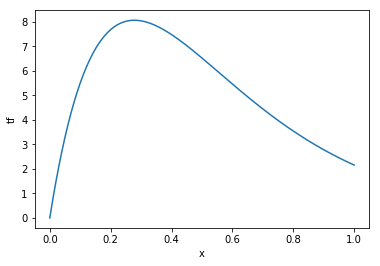

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,200)
tf = 5.3 * x * np.exp(-3.6*x + 2.7)
plt.plot(x, tf)
plt.ylabel('tf')
plt.xlabel('x')

## Solution with Scipy.optimize

This problem can be solved using the standard `scipy.optimize` library. Because this is a function of a single variable, we use `minimize_scalar` with default methods.

For this solution we import `math.exp` to perform the exponential calculation. Doing this will avoid a namespace collision with Pyomo which which uses it's own implementation of the exponential function.

In [3]:
from scipy.optimize import minimize_scalar
import math

def func(x):
    return -(5.3 * x * math.exp(-3.6*x + 2.7))

minimize_scalar(func, bracket=[0,1])

     fun: -8.0588669933761565
    nfev: 15
     nit: 14
 success: True
       x: 0.27777777778721241

## Solution with Pyomo

This example is quite straightforward, and using a tool like Pyomo with the ipopt solver is certainly overkill. Nevertheless it is a useful illustration of how nonlinear optimization problems can be solved in Pyomo with the right solvers.

Note the use of `exp` to calculate the exponential function. This is imported from pyomo.environ and is needed so that a Pyomo variable can be used in the argument to `exp`.

In [5]:
from pyomo.environ import *

model = ConcreteModel()
model.x = Var(initialize=0.5, bounds=(0,1))

model.objective = Objective(expr = 5.3 * model.x * exp(-3.6*model.x + 2.7), sense=maximize)

SolverFactory('ipopt').solve(model)
model.x()

0.2777777778309363